# Neighborhood Comparison by Leveraging Foursquare Data

## 1. Description of the problem and a discussion of the background

#### As a way to leverage what was learned in previous modules from this course, I had chosen to compare how similar or dissimilar are two important European Cities, Financial Capitals of two Countries. As these two cities are geographically near, I chose to compare Paris and London, by obtaining the number and type of Foursquare Venues close to the center coordinates (Latitude and Longitude) of each Neighborhood.

#### As cities are geographically near, chosen cities, would allow to use the K-Means Clustering and Geographical Information that can be graphically shown in the same map. Clusters will allow to group Neighborhoods, based on similar characteristics (frequency and types of Foursquare Venues).

## 2. Description of the data and how it will be used to solve the problem

#### This exercise was an great opportunity to leverage what was learned in previous courses. First step was to obtain, clean and consolidate the data. The following sections summarize the process followed.

### 2.1 Geographic Data Gathering: Paris

#### In order to obtain Paris Data, I found out that Paris is divided in twelve Districts (arrondissements). I had subscribed for free to French Post Office (Le Groupe La Poste). Their address is https://datanova.laposte.fr/page/accueil/ and obtained two files: arrondissements.json (geographic JSON File) and arrondissements.zip, which contains arrondissements.dbf, arrondissements.prj, arrondissements.shp and arrondissements.shx Shape File. Below it is how I mapped the France Districts from the obtained information.

In [18]:
import geopandas as gpd
# set the filepath and load in a shapefile
fp = "arrondissements.shp"
arrondisements_map_df = gpd.read_file(fp, encoding='utf-8')
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
arrondisements_map_df.head()

,n_sq_ar,c_ar,c_arinsee,l_ar,l_aroff,n_sq_co,surface,perimetre,objectid,longueur,geometry
0,750000002.0,2.0,75102.0,2ème Ardt,Bourse,750001537.0,991153.0,4554.0,2.0,4553.0,"POLYGON ((2.351518483670821 48.8644258050741, ..."
1,750000003.0,3.0,75103.0,3ème Ardt,Temple,750001537.0,1170882.0,4519.0,3.0,4519.0,"POLYGON ((2.363828096062925 48.86750443060333,..."
2,750000012.0,12.0,75112.0,12ème Ardt,Reuilly,750001537.0,16314782.0,24089.0,12.0,24088.0,"POLYGON ((2.413879624300607 48.83357143972265,..."
3,750000001.0,1.0,75101.0,1er Ardt,Louvre,750001537.0,1824612.0,6054.0,1.0,6054.0,"POLYGON ((2.328007329038849 48.86991742140715,..."
4,750000004.0,4.0,75104.0,4ème Ardt,Hôtel-de-Ville,750001537.0,1600585.0,5420.0,4.0,5420.0,"POLYGON ((2.368512371393433 48.85573412813671,..."


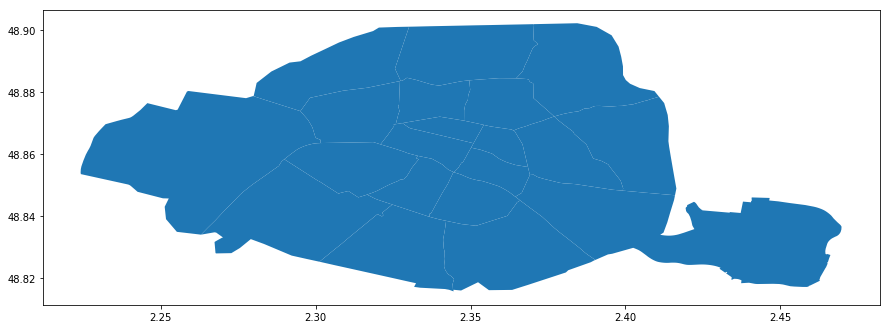

In [25]:
paris_districts_plot=arrondisements_map_df.plot(figsize=(15, 15))
paris_districts_fig=paris_districts_plot.get_figure()
paris_districts_fig.savefig('paris_districts_fig.png')

#### Below it is the obtained figure of Paris Districts

![Paris Districts Figure](paris_districts_fig_cropped.png "Paris Districts")

### 2.2 Geographic Data Gathering: London

#### London Geographic Data was obtained in Greater London Authority (GLA) Site is located in https://data.london.gov.uk/dataset/statistical-gis-boundary-files-london I had downloaded statistical-gis-boundaries-london.zip and used the following relevant files: 
* London_Borough_Excluding_MHW.dbf
* London_Borough_Excluding_MHW.GSS_CODE.atx
* London_Borough_Excluding_MHW.NAME.atx
* London_Borough_Excluding_MHW.prj
* London_Borough_Excluding_MHW.sbn
* London_Borough_Excluding_MHW.sbx
* London_Borough_Excluding_MHW.shp
* London_Borough_Excluding_MHW.shp.xml
* London_Borough_Excluding_MHW.shx

#### To verity regions of London, I had found a very interesting Article by Benjamin Coley, with a walkthrough on how to leverage Geopandas, Pandas and Matplotlib. Article is called "Let’s make a map! Using Geopandas, Pandas and Matplotlib to make a Choropleth map" and it can be found on  https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d

#### By using GeoPandas, London Geographig Information was used to create a Geopandas Data Frame

In [34]:
import geopandas as gpd
# set the filepath and load in a shapefile
fp = "London_Borough_Excluding_MHW.shp"
london_map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
london_map_df.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.6 160201.8, 516407.3 160210.5..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.2 159504.7, 535005.5 159502, ..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.6 157530.4, 540361.2 157551.9..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.8 178100, 521967.7 178096.8, ..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.5 182881.6, 510249.9 182886, ..."


In [36]:
london_map_df.shape

(33, 8)

In [39]:
type(london_map_df)

geopandas.geodataframe.GeoDataFrame

In [40]:
london_map_df.columns

Index(['NAME', 'GSS_CODE', 'HECTARES', 'NONLD_AREA', 'ONS_INNER', 'SUB_2009',
       'SUB_2006', 'geometry'],
      dtype='object')

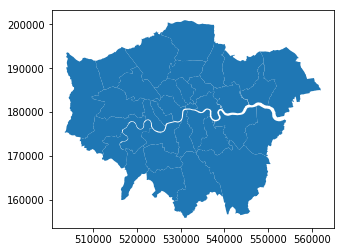

In [41]:
london_map_df.plot()

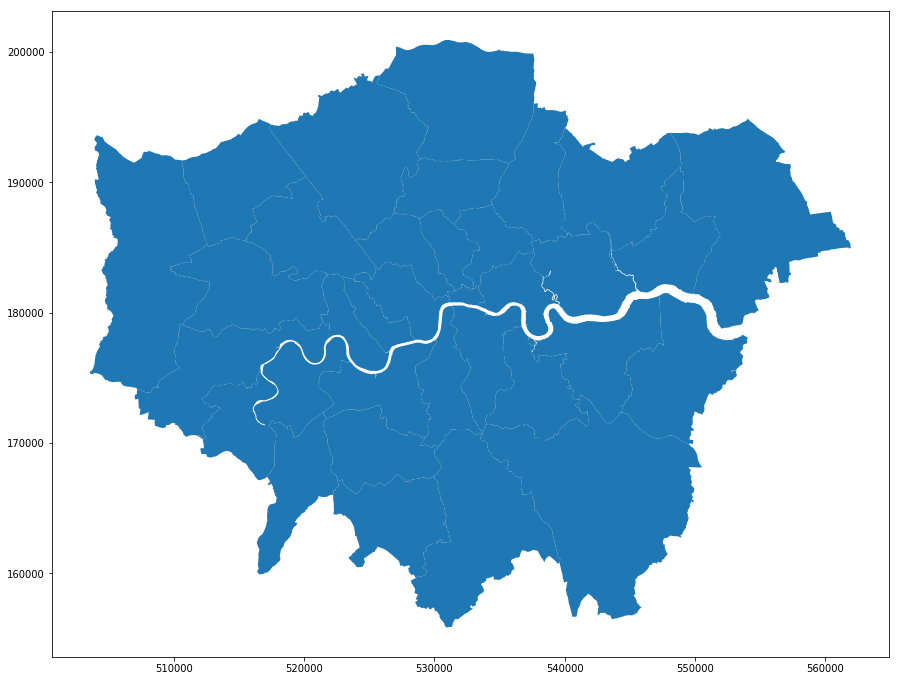

In [42]:
london_boroughs_plot=london_map_df.plot(figsize=(15, 15))
london_boroughs_fig=london_boroughs_plot.get_figure()
london_boroughs_fig.savefig('london_boroughs_fig.png')

#### This is how London Boroughs Map was displayed. The challenge was that coordinates system was not Latitude or Longitude based but in Universal Transverse Mercator (UTM) coordinate system. More details about this system can be found in Wikipedia under the following reference: https://en.wikipedia.org/wiki/Universal_Transverse_Mercator_coordinate_system

![London Boroughs Figure]( london_boroughs_fig_cropped.png "London Boroughs")

### The article mentioned before, also included a reference to https://data.london.gov.uk/dataset/london-borough-profiles on which I found a useful dataset called london-borough-profiles.csv

#### This is how I read this Dataset

In [28]:
import pandas as pd
london_df = pd.read_csv('london-borough-profiles.csv', header=0)
london_df.head()

,Code,Area_name,Inner/_Outer_London,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015",...,Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
0,E09000001,City of London,Inner London,8800,5326,290,30.3,43.2,11.4,73.1,...,6.0,5.6,NaN,2.6,129,.,.,.,.,.
1,E09000002,Barking and Dagenham,Outer London,209000,78188,"3,611",57.9,32.9,27.2,63.1,...,7.1,3.1,28.5,7.3,228,Lab,0,100,0,36.5
2,E09000003,Barnet,Outer London,389600,151423,"8,675",44.9,37.3,21.1,64.9,...,7.4,2.8,20.7,6.0,134,Cons,50.8,.,1.6,40.5
3,E09000004,Bexley,Outer London,244300,97736,"6,058",40.3,39.0,20.6,62.9,...,7.2,3.3,22.7,6.9,164,Cons,71.4,23.8,0,39.6
4,E09000005,Brent,Outer London,332100,121048,"4,323",76.8,35.6,20.9,67.8,...,7.2,2.9,24.3,7.9,169,Lab,9.5,88.9,1.6,36.3


#### This is how relevant columns were selecteed from the Data Set

In [29]:
london_df=london_df[['Area_name','Happiness_score_2011-14_(out_of_10)','Anxiety_score_2011-14_(out_of_10)','Population_density_(per_hectare)_2017','Mortality_rate_from_causes_considered_preventable_2012/14']]

#### This is how relevant columns were renamed to easier to understand names

In [32]:
london_data_for_map = london_df.rename(index=str, columns={"Area_name": "borough","Happiness_score_2011-14_(out_of_10)": "happiness",
"Anxiety_score_2011-14_(out_of_10)": "anxiety",
"Population_density_(per_hectare)_2017": "pop_density_per_hectare",
"Mortality_rate_from_causes_considered_preventable_2012/14": "mortality"})
# check dat dataframe
london_data_for_map.head()

,borough,happiness,anxiety,pop_density_per_hectare,mortality
0,City of London,6.0,5.6,30.3,129
1,Barking and Dagenham,7.1,3.1,57.9,228
2,Barnet,7.4,2.8,44.9,134
3,Bexley,7.2,3.3,40.3,164
4,Brent,7.2,2.9,76.8,169


#### This is how geographical information was merged with the Boroughs Profile Data Set

In [38]:
# join the geodataframe with the cleaned up csv dataframe
london_merged = london_map_df.set_index('NAME').join(london_data_for_map.set_index('borough'))
london_merged.head()

,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,happiness,anxiety,pop_density_per_hectare,mortality
NAME,,,,,,,,,,,
Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.6 160201.8, 516407.3 160210.5...",7.4,3.3,47.1,141
Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.2 159504.7, 535005.5 159502, ...",7.2,3.3,44.7,178
Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.6 157530.4, 540361.2 157551.9...",7.4,3.3,21.8,148
Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.8 178100, 521967.7 178096.8, ...",7.4,3.4,49,166
Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.5 182881.6, 510249.9 182886, ...",7.3,3.6,63.3,164


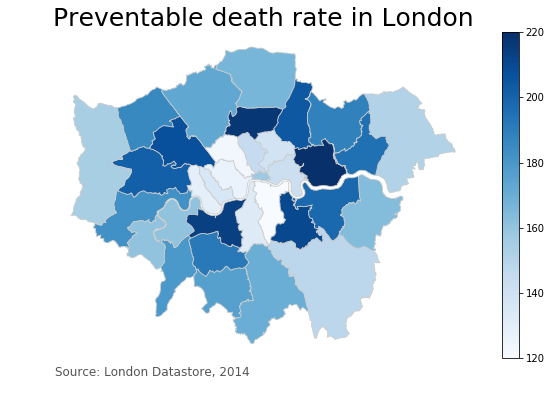

In [45]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'pop_density_per_hectare'
# set the range for the choropleth
vmin, vmax = 120, 220
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

ax = london_merged.plot(column=variable, cmap='Blues',linewidth=0.8, edgecolor='0.8', ax=ax)

ax.set_axis_off()
# add a title
ax.set_title('Preventable death rate in London', fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Source: London Datastore, 2014',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

fig.savefig('map_london_export.png', dpi=300)

plt.show()

#### This is how the London Cloropleth Map for London looked like

![London Cloropleth Figure]( map_london_export.png "London Cloropleth")

#### As mentioned before, London Geographic Information was in Universal Transverse Mercator (UTM) coordinate system and transformation to Latitude and Longitude Coordinates was not straight forward, even though there was a library called UTM. As Foursquare requires latitude and Longitued and we had the geographic shapes of London Boroughs, I had decided to identify the "official" coordinated of each of the Boroughs, instead of using the Centroid of each Polygon.

#### I had used the Latitude and longitude obtained from DISTANCESTO.COM. For Example, these are the coordinates of Westmister. https://www.distancesto.com/coordinates/gb/city-of-westminster-latitude-longitude/history/44297.html

#### I had created and imported an Excel Spreadsheet with the London Borough Coordinates (London_Boroughs_Coordinates.xlsx)

In [48]:
filename2='London_Boroughs_Coordinates.xlsx'
df_london_borough_coordinates = pd.read_excel(filename2)

In [50]:
df_london_borough_coordinates

,Borough,Latitude,Longitude
0,Barking and Dagenham,51.546483,0.129350
1,Barnet,51.625150,-0.152936
2,Bexley,51.451902,0.117179
3,Brent,51.567281,-0.271057
4,Bromley,51.367971,0.070062
5,Camden,51.551706,-0.158826
6,City of London,51.512344,-0.090985
7,Croydon,51.367971,-0.070062
8,Ealing,51.525026,-0.341500
9,Enfield,51.662293,-0.118066


#### Finally, I had merged the Borough Attributes information with the Coordinates to have the final London Dataset with Latitude and Longitude to be used to obtain Foursquare Venues information

In [51]:
london_merged=london_merged.join(df_london_borough_coordinates.set_index('Borough'))
london_merged.head()

,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,happiness,anxiety,pop_density_per_hectare,mortality,Latitude,Longitude
NAME,,,,,,,,,,,,,
Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.6 160201.8, 516407.3 160210.5...",7.4,3.3,47.1,141,51.378117,-0.292709
Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.2 159504.7, 535005.5 159502, ...",7.2,3.3,44.7,178,51.367971,-0.070062
Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.6 157530.4, 540361.2 157551.9...",7.4,3.3,21.8,148,51.367971,0.070062
Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.8 178100, 521967.7 178096.8, ...",7.4,3.4,49,166,51.482836,-0.388206
Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.5 182881.6, 510249.9 182886, ...",7.3,3.6,63.3,164,51.525026,-0.341500
